In [2]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler

dataset = pd.read_csv("fraud_oracle.csv")

#removing unrelated variables from the data set
updated_ds = dataset.drop(["Month","WeekOfMonth","DayOfWeek", "Make", "DayOfWeekClaimed", "MonthClaimed", "WeekOfMonthClaimed", 
                   "RepNumber", "Deductible", "AgeOfPolicyHolder","PastNumberOfClaims","PolicyNumber", "AddressChange_Claim","NumberOfCars","Year"],axis =1)

#drop fetures that identified as unimportant by feature extraction method using R-Studio

updated_ds_new = updated_ds.drop(["AccidentArea", "AgentType", "DriverRating", "NumberOfSuppliments","PoliceReportFiled","VehiclePrice"],axis =1)


# For Days_Policy_Accident it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'more than 30', 'Days_Policy_Accident'] = '31'

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'none', 'Days_Policy_Accident'] = '0'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '8 to 15', 'Days_Policy_Accident'] = '11.5'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '15 to 30', 'Days_Policy_Accident'] = '22.5'

# mean of range 1 t0 7 ->  1+2+3+4+5+6+7/7 = 4 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '1 to 7', 'Days_Policy_Accident'] = '4'


# For Days_Policy_Claim it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'more than 30', 'Days_Policy_Claim'] = '31'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '15 to 30', 'Days_Policy_Claim'] = '22.5'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '8 to 15', 'Days_Policy_Claim'] = '11.5'

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'none', 'Days_Policy_Claim'] = '0'

# For AgeOfVehicle it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '7 years', 'AgeOfVehicle'] = '7'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'more than 7', 'AgeOfVehicle'] = '8'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '6 years', 'AgeOfVehicle'] = '6'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '5 years', 'AgeOfVehicle'] = '5'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'new', 'AgeOfVehicle'] = '0'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '4 years', 'AgeOfVehicle'] = '4'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '3 years', 'AgeOfVehicle'] = '3'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '2 years', 'AgeOfVehicle'] = '2'

# changing datatypes of the dataset as per the above transformations
updated_ds_new['Days_Policy_Accident'] = updated_ds_new['Days_Policy_Accident'].astype('float')
updated_ds_new['Days_Policy_Claim'] = updated_ds_new['Days_Policy_Claim'].astype('float')
updated_ds_new['AgeOfVehicle'] = updated_ds_new['AgeOfVehicle'].astype('float')

updated_ds_new.dtypes

# perform OHE for categorical data 
one_hot_encoded_data = pd.get_dummies(updated_ds_new, columns = ['Sex', 'MaritalStatus','Fault','PolicyType', 'VehicleCategory','WitnessPresent','BasePolicy'])



In [3]:
one_hot_encoded_data

,Age,FraudFound_P,Days_Policy_Accident,Days_Policy_Claim,AgeOfVehicle,Sex_Female,Sex_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,...,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,WitnessPresent_No,WitnessPresent_Yes,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,21,0,31.0,31.0,3.0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,34,0,31.0,31.0,6.0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2,47,0,31.0,31.0,7.0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,65,0,31.0,31.0,8.0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,27,0,31.0,31.0,5.0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,35,1,31.0,31.0,6.0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
15416,30,0,31.0,31.0,6.0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
15417,24,1,31.0,31.0,5.0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
15418,34,0,31.0,31.0,2.0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [4]:
fraud_claims = one_hot_encoded_data[one_hot_encoded_data['FraudFound_P'] == 1]

In [5]:
fraud_claims

,Age,FraudFound_P,Days_Policy_Accident,Days_Policy_Claim,AgeOfVehicle,Sex_Female,Sex_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,...,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,WitnessPresent_No,WitnessPresent_Yes,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
28,0,1,31.0,31.0,0.0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
52,21,1,31.0,31.0,4.0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
53,50,1,31.0,31.0,8.0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
94,34,1,31.0,31.0,7.0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
96,38,1,31.0,31.0,7.0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15409,65,1,31.0,31.0,7.0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
15412,28,1,31.0,31.0,5.0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
15415,35,1,31.0,31.0,6.0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
15417,24,1,31.0,31.0,5.0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [6]:
fraud_claims.describe()

,Age,FraudFound_P,Days_Policy_Accident,Days_Policy_Claim,AgeOfVehicle,Sex_Female,Sex_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,...,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,WitnessPresent_No,WitnessPresent_Yes,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
count,923.000000,923.0,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,...,923.000000,923.0,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,38.265439,1.0,30.535211,30.881365,6.386782,0.113759,0.886241,0.003250,0.692308,0.301192,...,0.003250,0.0,0.861322,0.091008,0.047671,0.996750,0.003250,0.489707,0.471289,0.039003
std,13.871426,0.0,3.500326,1.301284,1.648939,0.317691,0.317691,0.056949,0.461789,0.459025,...,0.056949,0.0,0.345798,0.287776,0.213184,0.056949,0.056949,0.500165,0.499446,0.193708
min,0.000000,1.0,0.000000,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.0,31.000000,31.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,1.0,31.000000,31.000000,7.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,46.000000,1.0,31.000000,31.000000,7.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,80.000000,1.0,31.000000,31.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
import pandas as pd
from scipy import stats

stats.ttest_1samp(fraud_claims["Age"], 26)  

Ttest_1sampResult(statistic=26.863515137100123, pvalue=7.08983870374254e-118)

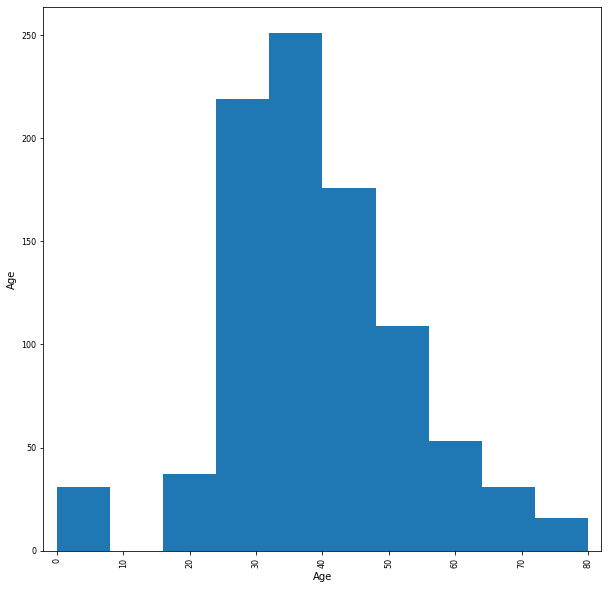

In [8]:
#Histograms Matrix
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
dataframe = pd.DataFrame(fraud_claims, columns=["Age"])
pandas.plotting.scatter_matrix(dataframe,figsize= (10,10))
plt.show()

In [18]:
import pandas as pd
from scipy import stats

stats.ttest_1samp(fraud_claims["Age"], 38)

Ttest_1sampResult(statistic=0.5813586439881209, pvalue=0.5611408568660088)

In [19]:
import pandas as pd
from scipy import stats

stats.ttest_1samp(fraud_claims["Age"], 39)

Ttest_1sampResult(statistic=-1.6088210637712128, pvalue=0.10799780258573387)

In [21]:
import pandas as pd
from scipy import stats

stats.ttest_1samp(fraud_claims["Age"], 40)

Ttest_1sampResult(statistic=-3.7990007715305465, pvalue=0.00015480369558047537)

In [24]:
import pandas as pd
from scipy import stats

stats.ttest_rel(fraud_claims['Days_Policy_Accident'],fraud_claims['Days_Policy_Claim'])



Ttest_relResult(statistic=-3.610425733478035, pvalue=0.00032217172423303975)